## Финальное соревнование

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

В данном задании вас ждет неизвестная зависимость. Ваша основная задача: **построить две лучших модели**, минимизирующих среднеквадратичную ошибку (MSE):
1. На первую модель не налагается ограничений.
2. Вторая модель должна быть **линейной**, т.е. представлять собой линейную комбинацию признаков плюс свободный член: $\boldsymbol{w}^{\top}\boldsymbol{x} + b$. При этом __вы можете использовать базовые математические операции для преобразования признаков__: np.exp, np.log, np.pow (полный список доступен в [документации](https://numpy.org/doc/stable/reference/routines.math.html)), а также линейные операции над ними (сумма, умножение на число и пр.). Для преобразования признаков вам будет необходимо написать функцию `my_transformation`. __Кол-во параметров (весов) используемых второй моделью не должно превышать 15 (включая свободный член).__

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в будущем писать код более уверенно

In [1]:
import os
import json

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Загрузка данных происходит ниже. Если она не срабатывает, самостоятельно скачайте файл `hw_final_open_data.npy` и положите его в ту же директорию, что и ноутбук.

In [2]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_data.npy -O hw_final_open_data.npy
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_target.npy -O hw_final_open_data.npy

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
assert os.path.exists('hw_final_open_data.npy'), 'Please, download `hw_final_open_data.npy` and place it in the working directory'
assert os.path.exists('hw_final_open_target.npy'), 'Please, download `hw_final_open_target.npy` and place it in the working directory'
data = np.load('hw_final_open_data.npy', allow_pickle=False)
target = np.load('hw_final_open_target.npy', allow_pickle=False)

Разбивка на `train` и `val` опциональна и сделана для вашего удобства.

In [4]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.2)

In [5]:
import pandas as pd
df = pd.DataFrame(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       800 non-null    float64
 1   1       800 non-null    float64
 2   2       800 non-null    float64
 3   3       800 non-null    float64
 4   4       800 non-null    float64
 5   5       800 non-null    float64
 6   6       800 non-null    float64
dtypes: float64(7)
memory usage: 43.9 KB


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

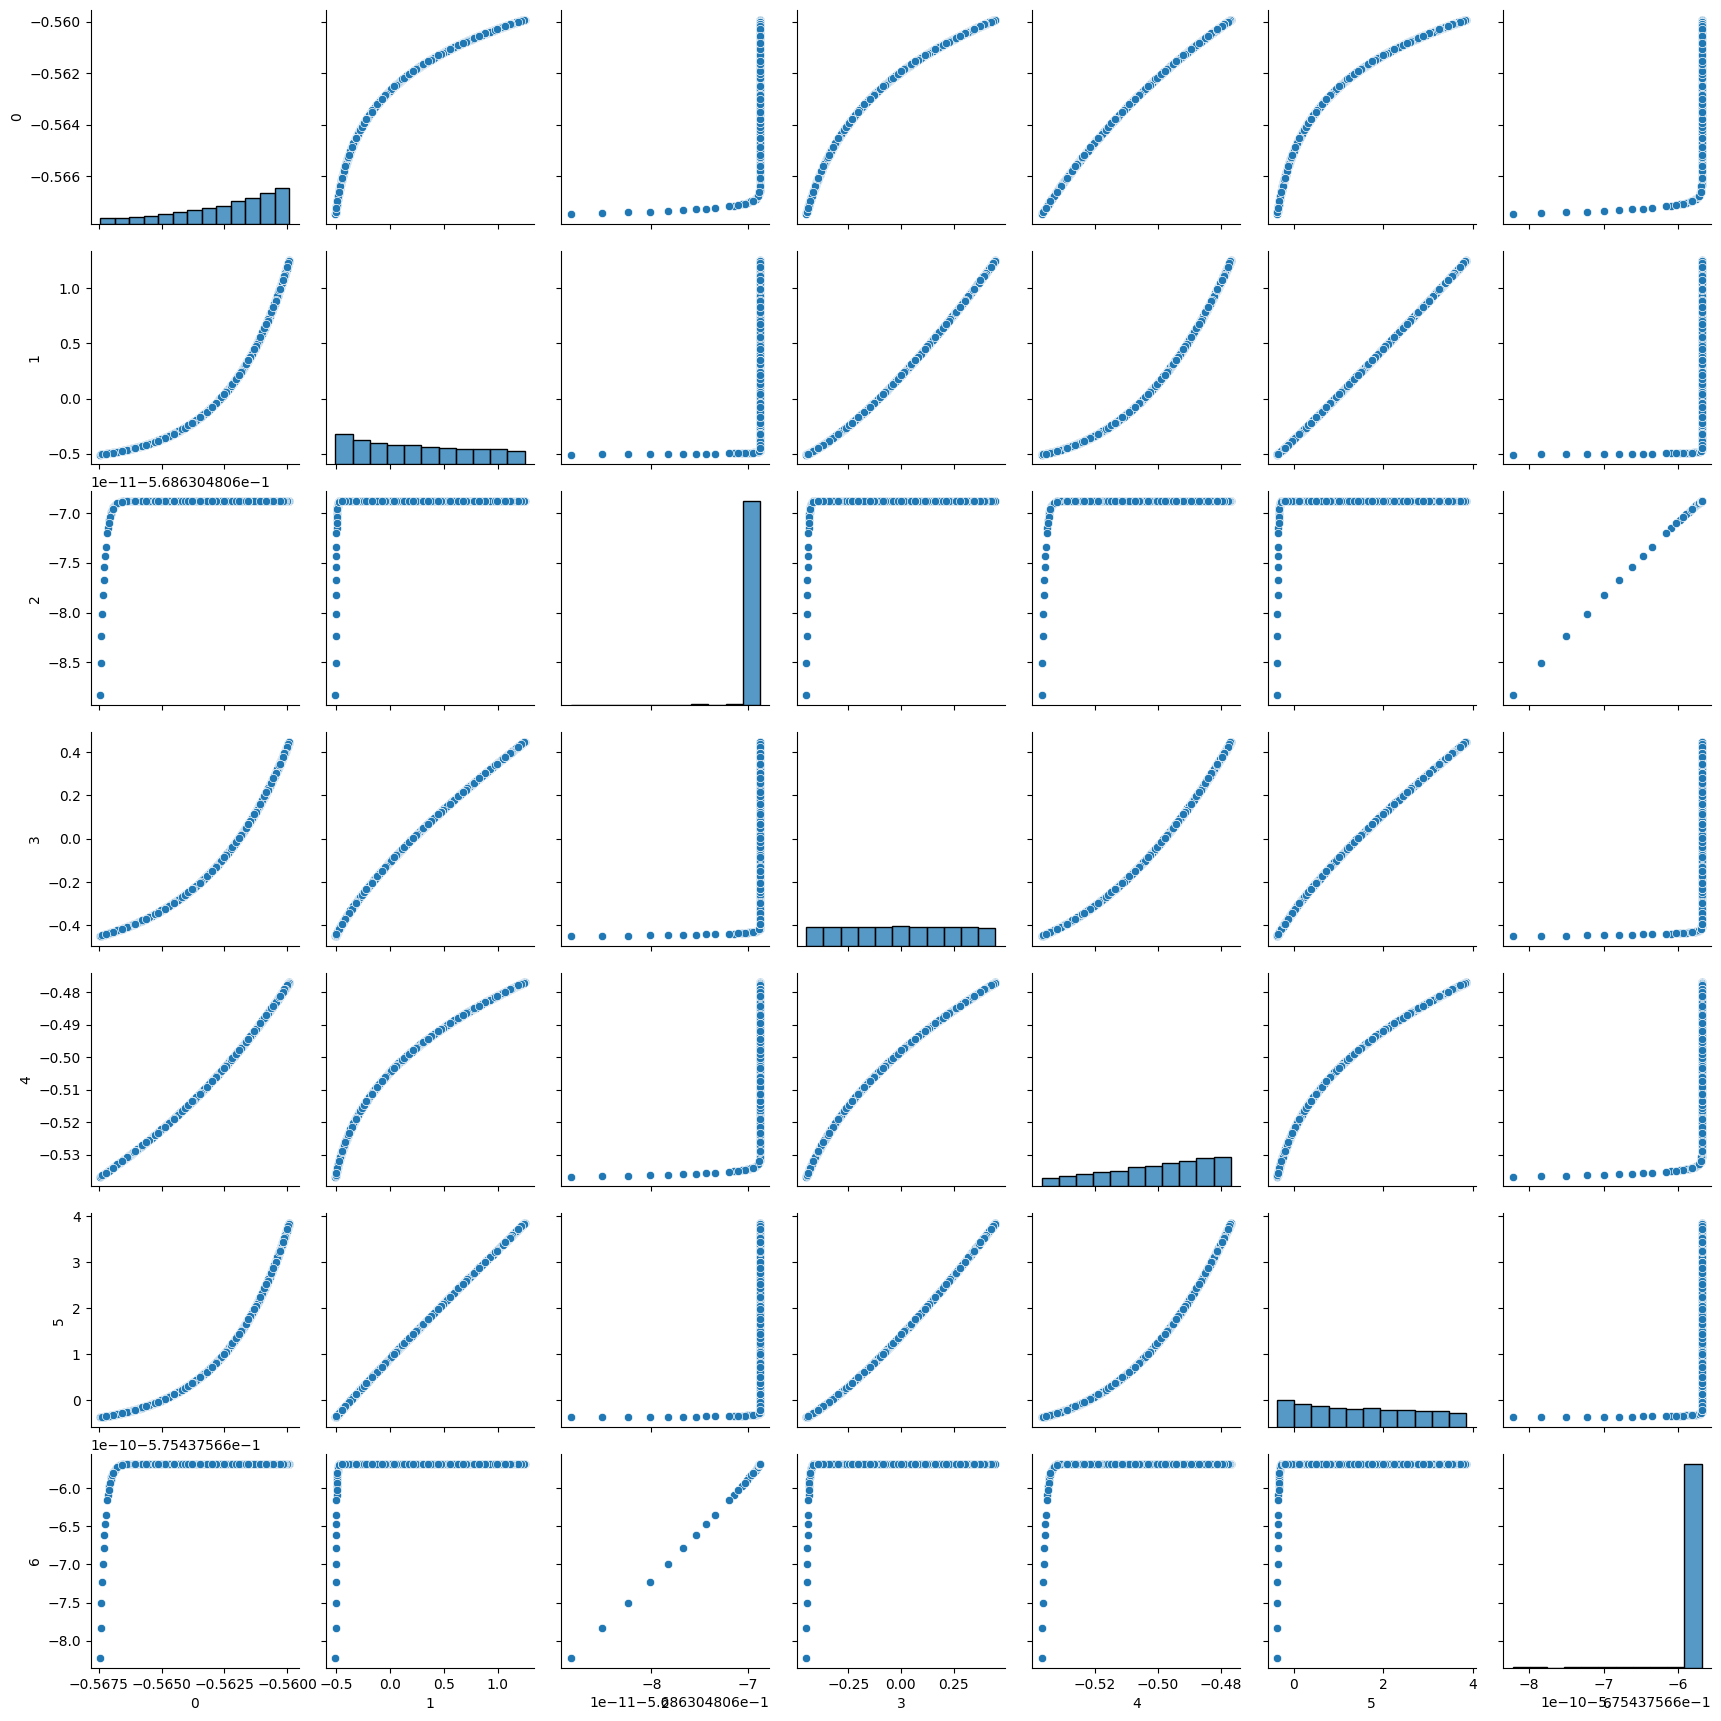

In [15]:
sns.pairplot(df)
plt.show()

In [17]:
target_df = pd.DataFrame(target)
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       800 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(train_x, train_y)
print(
    f'train mse =\t {mean_squared_error(np.round(lr.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(lr.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.17503
validation mse = 0.28750


In [13]:
from sklearn.linear_model import Ridge
lr2 = Ridge(alpha=0.30592294133204656).fit(train_x, train_y)
print(
    f'train mse =\t {mean_squared_error(np.round(lr2.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(lr2.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.18177
validation mse = 0.23750


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

ridger = Ridge()
param_dist = {
    'alpha': uniform(0.01, 1.3)
}
random_search = RandomizedSearchCV(estimator=ridger, param_distributions=param_dist, cv=5, n_iter=10)
random_search.fit(train_x, train_y)

# Get the best hyperparameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'alpha': 0.30592294133204656}
Best Score: 0.9808508199990497


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from scipy.stats import uniform, randint

ada_boost = AdaBoostRegressor(learning_rate=0.5311820977927957, loss= 'linear', n_estimators= 134).fit(train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(np.round(ada_boost.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(ada_boost.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.16528
validation mse = 0.27917


In [38]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV

bag = BaggingRegressor()
param_dist = {
    'n_estimators': randint(50, 500)
}
random_search = RandomizedSearchCV(estimator=bag, param_distributions=param_dist, cv=5, n_iter=10)
random_search.fit(train_x, train_y)

# Get the best hyperparameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'n_estimators': 146}
Best Score: 0.9729109544635739


In [39]:
bagres = BaggingRegressor(n_estimators=146).fit(train_x, train_y)
print(
    f'train mse =\t {mean_squared_error(np.round(bagres.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(bagres.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.10491
validation mse = 0.29583


In [42]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(criterion='squared_error', max_depth= 13,max_features= 'log2', min_samples_split= 12, n_estimators= 278).fit(train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(np.round(et.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(et.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.15227
validation mse = 0.29167


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
r = GradientBoostingRegressor()
param_dist = {
    'n_estimators': randint(50, 500),
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': uniform(0.001, 1.0),
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': randint(2,10),
    'max_depth': randint(1,15),
    'max_features': ['sqrt', 'log2']
}
random_search = RandomizedSearchCV(estimator=r, param_distributions=param_dist, cv=5, n_iter=10)
random_search.fit(train_x, train_y)

# Get the best hyperparameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'criterion': 'friedman_mse', 'learning_rate': 0.4784676999749602, 'loss': 'absolute_error', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 7, 'n_estimators': 85}
Best Score: 0.9738128775567395


In [50]:
from sklearn.kernel_ridge import KernelRidge
k = KernelRidge(alpha=1.5).fit(train_x, train_y)
print(
    f'train mse =\t {mean_squared_error(np.round(k.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(k.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.17803
validation mse = 0.28333


In [51]:
from sklearn.linear_model import SGDRegressor
s = SGDRegressor()
param_dist = {
    'loss': ['squared_error', 'epsilon_insensitive', 'huber', 'squared_epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'penalty': ['l2', 'l1']
}
random_search = RandomizedSearchCV(estimator=s, param_distributions=param_dist, cv=5, n_iter=10)
random_search.fit(train_x, train_y)
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'penalty': 'l2', 'loss': 'squared_epsilon_insensitive', 'learning_rate': 'constant'}
Best Score: 0.9811370882320993


In [56]:
sgd = SGDRegressor(penalty= 'l2',loss= 'squared_epsilon_insensitive', learning_rate= 'constant').fit(train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(np.round(sgd.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(sgd.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.17973
validation mse = 0.28333


In [14]:
from sklearn.linear_model import OrthogonalMatchingPursuit
omp = OrthogonalMatchingPursuit().fit(train_x, train_y)
print(
    f'train mse =\t {mean_squared_error(np.round(omp.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(omp.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.18026
validation mse = 0.27500


In [60]:
from sklearn import linear_model
ard = linear_model.ARDRegression().fit(train_x, train_y)
print(
    f'train mse =\t {mean_squared_error(np.round(ard.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(ard.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.17706
validation mse = 0.28333


In [61]:
bay = linear_model.BayesianRidge().fit(train_x, train_y)
print(
    f'train mse =\t {mean_squared_error(np.round(bay.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(bay.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.17724
validation mse = 0.28333


In [66]:
from sklearn.linear_model import PassiveAggressiveRegressor
regr = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3).fit(train_x, train_y)
print(
    f'train mse =\t {mean_squared_error(np.round(regr.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(regr.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.19496
validation mse = 0.29583


In [7]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

param_grid = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1,15),
    'learning_rate': uniform(0.001, 1.0),
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7]
}
random_search = RandomizedSearchCV(estimator=xg_reg, param_distributions=param_grid, n_iter=10, 
                                   scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=42)

random_search.fit(train_x, train_y)
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.047450412719997725, 'max_depth': 3, 'n_estimators': 184, 'subsample': 0.7}
Best Score: -0.10485389530605199


In [8]:
xgb = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree= 0.5, learning_rate=0.047450412719997725, 
                       max_depth= 3, n_estimators =184, subsample=0.7).fit(train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(np.round(xgb.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(xgb.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.15388
validation mse = 0.28750


## Models used:
1. Linear regression
2. ElasticNet
3. Random forest (nonlinear)
4. Ridge
5. Lasso
6. AdaBoost regressor (nonlinear)
7. BaggingRegressor (nonlinear)
8. ExtraTreesRegressor (nonlinear)
9. GradientBoostingRegressor (nonlinear)
10. KernelRidge
11. SGDRegressor
12. OrthogonalMatchingPursuit
13. ARDRegression
14. BayesianRidge
15. TweedieRegressor
16. PassiveAggressiveRegressor

### Модель №1
Напоминаем, в первой части задания ваша основная задача – получить наилучший результат без ограничений на модель. Сдаваться будут только предсказания модели.

Пример с использованием Random Forest доступен ниже.

In [7]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(np.round(rf.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(rf.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.10592
validation mse = 0.29583


##### Сдача первой части соревнования
Загрузите файл `hw_final_closed_data.npy` (ссылка есть на странице с заданием). Если вы используете sklearn-совместимую модель, для генерации посылки вы можете воспользоваться функцией `get_predictions`. В ином случае перепишите функцию для вашей модели и запустите код под следующей ячейкой для генерации посылки.

In [ ]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_closed_data.npy -O hw_final_closed_data.npy

In [7]:
assert os.path.exists('hw_final_closed_data.npy'), 'Please, download `hw_final_closed_data.npy` and place it in the working directory'
closed_data = np.load('hw_final_closed_data.npy', allow_pickle=False)

Если необходимо, преобразуйте данные. Преобразованную матрицу объект-признак сохраните в переменную `closed_data`.

In [14]:
def get_predictions(model, eval_data, step=10):
    predicted_values = model.predict(eval_data)
    return predicted_values

Обращаем ваше внимание, предсказания округляются до сотых!

In [15]:
predicted_values = np.round(get_predictions(model=lr2, eval_data=closed_data), 2)

assert predicted_values.shape == (closed_data.shape[0], ) 

In [16]:
# do not change the code in the block below
# __________start of block__________
def float_list_to_comma_separated_str(_list):
    _list = list(np.round(np.array(_list), 2))
    return ','.join([str(x) for x in _list])

submission_dict = {
    'predictions': float_list_to_comma_separated_str(predicted_values)
}
with open('submission_dict_final_p01.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
    
print('File saved to `submission_dict_final_p01.npy`')
# __________end of block__________

File saved to `submission_dict_final_p01.npy`


### Модель №2
Функция `my_transformation` принимает на вход матрицу объект-признак (`numpy.ndarray` типа `np.float`) и преобразует ее в новую матрицу. Данная функция может использовать только numpy-операции, а также арифметические действия.

Для примера доступна функция ниже. Она лишь добавляет новый признак, представляющий собой произведение первого и второго исходных признаков (считая с нуля).

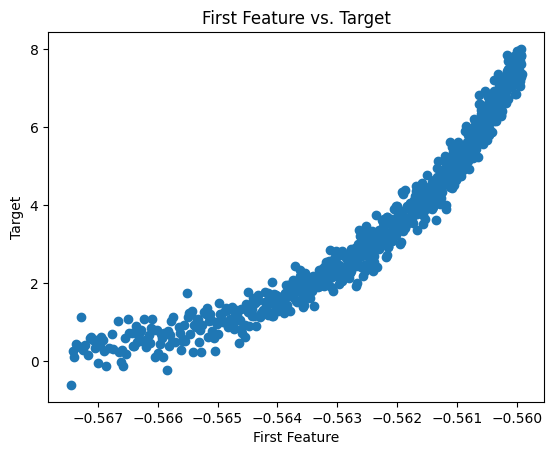

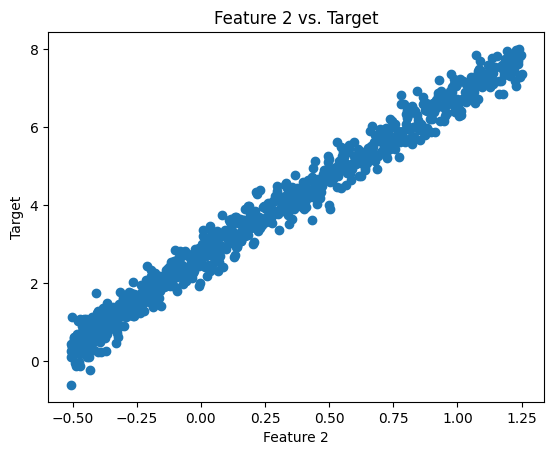

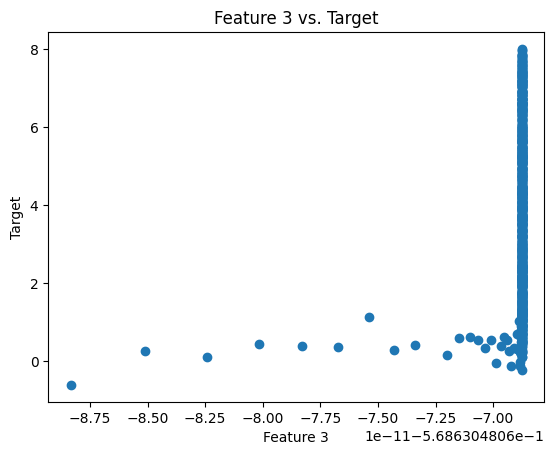

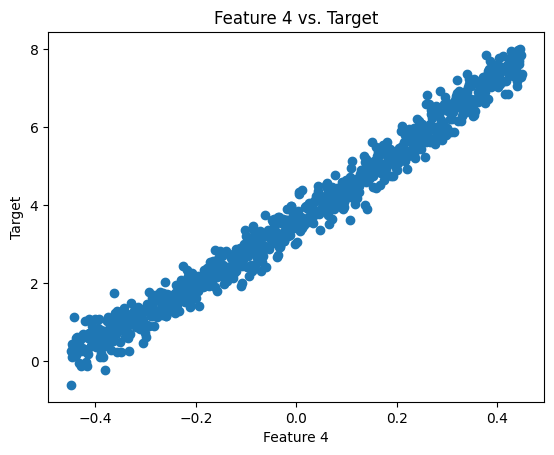

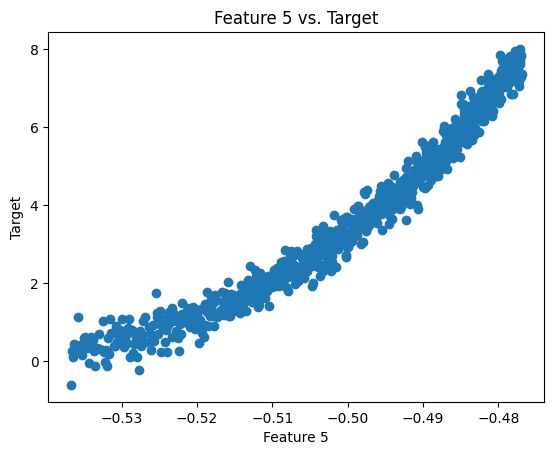

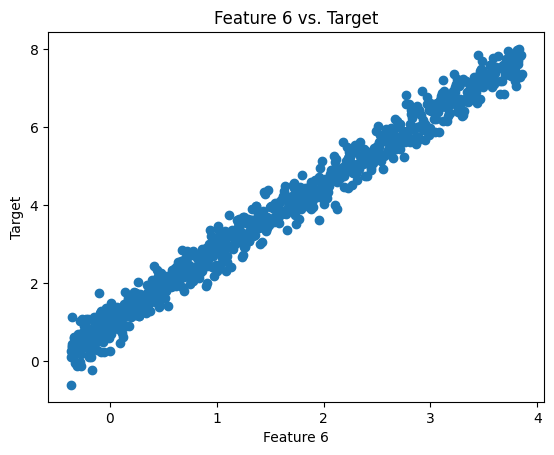

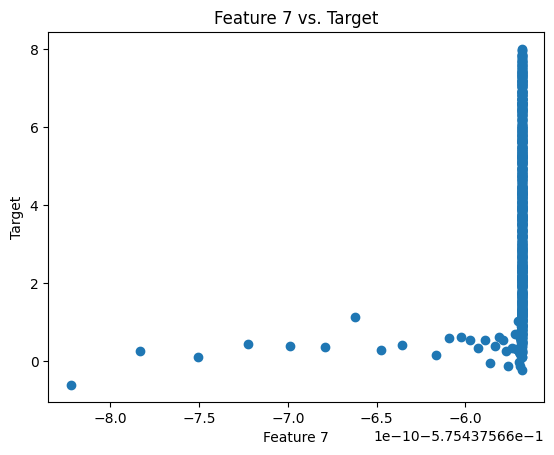

In [67]:
x = df.iloc[:, 0]
y = target_df


plt.scatter(x, y)
plt.xlabel('First Feature')
plt.ylabel('Target')
plt.title('First Feature vs. Target')
plt.show()


for i in range(1, len(df.columns)): 
    x = df.iloc[:, i]
    plt.scatter(x, y)
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('Target')
    plt.title(f'Feature {i + 1} vs. Target')
    plt.show()

In [73]:
def my_transformation(feature_matrix: np.ndarray):
    columns_to_drop = [0, 1, 2, 6]
    new_feature_matrix = np.delete(feature_matrix, columns_to_drop, axis=1)
    first_feature = new_feature_matrix[:, 0]
    quadratic_feature = first_feature ** 2
    sec_feature = new_feature_matrix[:, 1]
    second_quad = sec_feature ** 2
    new_feature_matrix = np.column_stack((new_feature_matrix, quadratic_feature, second_quad))
    return new_feature_matrix

In [74]:
transformed_train_x = my_transformation(train_x)

In [75]:
lr = Ridge()
lr.fit(transformed_train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(lr.predict(transformed_train_x), train_y):.5f}',
    f'validation mse = {mean_squared_error(lr.predict(my_transformation(valid_x)), valid_y):.5f}',
    sep='\n'
)

train mse =	 0.09475
validation mse = 0.07951


Обращаем ваше внимание, что параметры линейной модели будут округляться до __четырех знаков после запятой__. Это не должно сильно повлиять на качество предсказаний:

In [76]:
original_predictions = lr.predict(transformed_train_x)
rounded_predictions = transformed_train_x.dot(np.round(lr.coef_, 4)) + np.round(lr.intercept_, 4)


assert np.allclose(original_predictions, rounded_predictions, atol=1e-3)

Параметры вашей модели:

In [77]:
w_list = list(np.round(lr.coef_, 4))
print(f'w = {list(np.round(lr.coef_, 4))}\nb = {np.round(lr.intercept_, 4)}')

w = [0.4094, 0.029, 1.6703, -0.2341, -0.0295]
b = 1.2197


Напоминаем, ваша модель не должна использовать более 15 параметров (14 весов плюс свободный член).

In [ ]:
assert len(w_list) + 1 <= 15

##### Сдача второй части соревнования
Для сдачи вам достаточно отправить функцию `my_transformation` и параметры вашей модели в контест в задачу №2. Пример посылки доступен ниже. Имортирование `numpy` также необходимо.

In [ ]:
# __________example_submission_start__________
import numpy as np
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+1))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, -1] = feature_matrix[:, 0
    ] * feature_matrix[:, 1]
    return new_feature_matrix

w_submission = [-0.0027, -0.2637, 0.0, -0.1134, -0.0165, -0.9329, 0.0, 0.1293]
b_submission = 1.1312
# __________example_submission_end__________

На этом задание завершено. Поздравляем!